## **Probability from theory to advanced applications**

https://colab.research.google.com/drive/1TRTWLLi0cMF6A1FUPFC3gxnazSQlDzhI?usp=sharing

### Table of Contents

1. Probabiltiy Theory definitions
2. Statistics
  1. Gaussian/ Normal distribution
3. Estimation Theory
  1. Expected Value
  2. Bayesian Inference
  3. Conjugate Priors
  4. Example 1 of Bayesian Inference
  5. Example 2 of Bayesian Inference
  6. Law of Large Numbers
  7. Central Limit Theorem
  8. Maximum Likelihood Estimation
4. Decision Theory
  1. Empirical Risk Minimization
  2. Linear Regression



## Probability Theory Definitions


**Kolmogorov’s axioms of probability**

1. **Non-negativity**: For any event A, the probability of A is a non-negative real number, denoted by $$P(A) \ge 0$$.

2. **Additivity**: For any collection of mutually exclusive events $A_{1}, A_{2}, ..., A_{n}$ (i.e., events that cannot occur simultaneously), the probability of their union is the sum of their individual probabilities: 

$$P(A_{1}\cup A_{2}\cup ... \cup A_{n}) = P(A_{1}) + P(A_{2}) + ... + P(A_{n})$$.

3. **Normalization**: The probability of the entire sample space $\Omega$ (i.e., the set of all possible outcomes) is 1: $$P(\Omega) = 1$$

- A probability can be expressed as a percent or a fraction e.g. ½ or 50%
- Notationally, we write P(A) = ½.
- Geometrically, we can think of this as saying some even A takes up ½ of the space or occurs ½ of the time if you draw randomly from this event space.
- **Sample space** - 

**Types of probabilities**
- **Joint probability** - probability distribution of two or more events occurring together. $$P(A, B) = P(A \cap B) = \frac{\vert A\cap B\vert}{\vert\Omega\vert}$$

- **Marginal probability** - probability distribution of one or more variables in a multivariable distribution.
Obtain the marginal probability, but summing (also known as marginalizing/ integrating out) all other variables except the one you want.

$$
\begin{align}
  P(B) &= \sum_{a_{i}\in A} P(a_{i}, B)\\
       &= \frac{\vert B\vert}{\vert\Omega\vert}
\end{align}
$$

$$
\begin{align}
  P(A) &= \sum_{b_{i}\in B} P(A, b_{i})\\
       &= \frac{\vert A\vert}{\vert\Omega\vert}
\end{align}
$$

- **Conditional probability** - probability of an event A occurring, given that another event B has occurred. Note, B has occurred, meaning there’s a concept of time. B happens first and then A. Note that $P(A, B) = P(B, A)$.
$$P(A | B) = \frac{P(A, B)}{P(B)}$$
$$P(B | A) = \frac{P(B, A)}{P(A)}$$


**Bayes Theorem/Rule**

$$
\begin{align}
  P(A | B) &= \frac{P(A, B)}{P(B)}\\
  P(A | B)\times P(B) &= P(A, B)\\
  P(A | B)\times P(B) &= P(B | A)\times P(A)
\end{align}
$$

therefore,

$$
\underset{posterior}{\underbrace{P(A\vert B)}}=\frac{\overset{likelihood}{\overbrace{P(B\vert A)}} \times \overset{prior}{\overbrace{P(A)}}}{\underset{evidence}{\underbrace{P(B)}}}
$$

Bayes rule is an equation for updating your prior belief $P(A)$ given data $B$.

- **Prior** - Assumed probability distribution before some evidence is taken into account.

- **Evidence** - Probability of generating the observed sample from a prior.

- **Likelihood** - A measure of how well a particular statistical model or hypothesis explains observed data. 
  - In contrast to probability, likelihood does not have a strict range between 0 and 1, and its absolute value has no direct interpretation. 
  - Instead, likelihood is typically used to compare different parameter values or models to see which one best fits the observed data.
- **Posterior** - A conditional probability that results from updating the prior probability with information summarized by the likelihood via an application of Bayes' rule.



In this example, we'll use Bayes' Rule to estimate the probability of having a certain disease given a positive test result. We'll use the following information:

1. The prevalence of the disease in the population (prior probability): 1%
2. The true positive rate (sensitivity) of the test: 99%
3. The true negative rate (specificity) of the test: 98%

Bayes' Rule states that:

$$P(A|B) = \frac{P(B|A) \times P(A)}{P(B)}$$

Where:

- P(A|B) is the probability of event A happening given that event B occurs
- P(B|A) is the probability of event B happening given that event A occurs
- P(A) is the prior probability of event A happening
- P(B) is the prior probability of event B happening

In this case, we want to calculate P(Disease|Positive Test). We'll start by calculating P(Positive Test), which can be found using the law of total probability:

```
P(Positive Test) = P(Positive Test|Disease) * P(Disease) + P(Positive Test|No Disease) * P(No Disease)
```

Here's a Python 3 program to demonstrate this using NumPy:


In [ ]:
import numpy as np

# Prior probability of having the disease
P_disease = 0.01

# True positive rate (sensitivity)
P_positive_given_disease = 0.99

# True negative rate (specificity)
P_negative_given_no_disease = 0.98

# Prior probability of not having the disease
P_no_disease = 1 - P_disease

# False positive rate (1 - specificity)
P_positive_given_no_disease = 1 - P_negative_given_no_disease

# Calculate P(Positive Test) using the law of total probability
P_positive = (P_positive_given_disease * P_disease) + (P_positive_given_no_disease * P_no_disease)

# Apply Bayes' Rule to calculate P(Disease|Positive Test)
P_disease_given_positive = (P_positive_given_disease * P_disease) / P_positive

print("Probability of having the disease given a positive test result: {:.2%}".format(P_disease_given_positive))


Probability of having the disease given a positive test result: 33.33%


## **Statistics**

**Random variable**

- A variable whose values depend on outcomes of a random phenomenon.

**Types of random variables**

- **Discrete random variable** - a random variable with discrete outcome values like a coin or die.
$$\text{Coin} = \{(\text{heads}, 50\%), (\text{tails}, 50\%)\}$$

- **Continuous random variable** - a random variable that models continuous-valued events. $$\text{Housing price} =\{($12,345.678, 50\%),...\}$$

**Expected value (First Moment)** - probability-weighted average of all its possible values

Expectation for ***Discrete Random Variables***:
$$\mathbb{E}[X]=\sum^{N}_{i=1}p_{i}x_{i},\ \text{s.t.}\ \sum^{N}_{i=1}p_{i}=1$$

Expectation for ***Continuous Random Variables***:
$$\mathbb{E}[X]=\int^{b}_{a}xf(x)dx$$


**Population variance(Second Moment)**
$$\sigma^{2}=\frac{1}{N}\sum^{N}_{i=1}(x_{i}-\mu)^{2}$$

**Population standard deviation**
$$\sigma=\big(\frac{1}{N}\sum^{N}_{i=1}(x_{i}-\mu)^{2}\big)^{\frac{1}{2}}$$

A measure of the amount of variation or dispersion of a set of values.

- **Population** - the true statistical measure in ***theory*** if you could observe all the data in existance.
- **Sample** - a statistiacal measure based on a portion of the population. In ***practice***, you will always be using sample statistics.
- In practice, you can use the sample statistics in place of the population statistics.

### Gaussian/ Normal distribution

$$
N(x; \mu, \sigma) = \frac{1}{\sigma\sqrt{2\pi}}e^{-\frac{1}{2}(\frac{x-\mu}{\sigma})^{2}}
$$

- $\mu$ - population mean
- $\sigma$ - population standard deviation

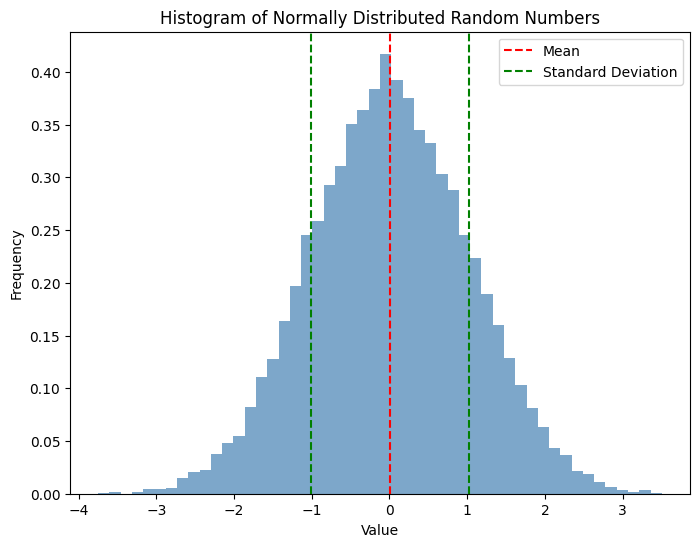

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Generate 10,000 random numbers from a normal distribution with mean 0 and standard deviation 1
data = np.random.normal(0, 1, 10000)

# Plot a histogram of the data
fig, ax = plt.subplots(figsize=(8,6))
ax.hist(data, bins=50, density=True, color='steelblue', alpha=0.7)
ax.set_title('Histogram of Normally Distributed Random Numbers')
ax.set_xlabel('Value')
ax.set_ylabel('Frequency')

# Add a vertical line at the mean and the standard deviation
mean = np.mean(data)
std = np.std(data)
ax.axvline(x=mean, color='red', linestyle='--', label='Mean')
ax.axvline(x=mean + std, color='green', linestyle='--', label='Standard Deviation')
ax.axvline(x=mean - std, color='green', linestyle='--')
ax.legend()

plt.show()

## **Estimation Theory**

Estimation theory is a branch of statistics that deals with the problem of estimating unknown parameters of a probability distribution based on a sample of data.

In many real-world applications, we are interested in making inferences about a population based on a sample of data. For example, we may want to estimate the mean or variance of a population, or the probability of an event occurring. Estimation theory provides a framework for making these inferences by defining and analyzing various estimators that can be used to estimate the unknown parameters of a distribution.

An estimator is a function of the sample data that is used to estimate a population parameter. The choice of estimator depends on the specific problem at hand and the properties of the sample data. For example, the sample mean is a commonly used estimator for the population mean, while the sample variance is a commonly used estimator for the population variance.

Estimation theory provides a way to evaluate the performance of different estimators and to determine which estimator is the best for a given problem. One important criterion for evaluating estimators is bias, which measures the difference between the expected value of an estimator and the true value of the parameter being estimated. Another important criterion is efficiency, which measures how well an estimator uses the available information in the sample data to estimate the parameter.

In addition to providing a framework for estimating parameters, estimation theory also deals with other related topics, such as hypothesis testing, confidence intervals, and model selection. These topics are all important for making statistical inferences and for making decisions based on data.

### Expected value
The expected value is an unbiased estimator because, on average, it gives the true value of the population parameter being estimated.

Formally, let X1, X2, ..., Xn be a random sample from a population with mean μ. The expected value of the sample mean X̄ is:

$$
\begin{align}
  E(\hat{X}) &= E[(X_{1} + X_{2} + ... + X_{n}) / n]\\
    &= (E[X_{1}] + E[X_{2}] + ... + E[X_{n}]) / n \quad\text{[by linearity of expectation]}\\
  &= (\mu + \mu + ... + \mu) / n\\
  &= \mu
\end{align}
$$

This means that the expected value of the sample mean is equal to the true mean of the population being sampled, regardless of the sample size.

An estimator is said to be unbiased if its expected value is equal to the true value of the population parameter being estimated. In the case of the sample mean, since its expected value is equal to the population mean, it is an unbiased estimator of the population mean.

In other words, if we repeatedly take random samples from a population and calculate their sample means, the average of these sample means will be equal to the true population mean. This property makes the sample mean a reliable and useful estimator in statistical inference and allows us to make inferences about the population based on a sample of data.

### **Bayesian Inference**

In simpler terms, Bayesian inference involves making a prediction or estimation about the likelihood of an event or hypothesis based on what we already know (prior knowledge) and what we observe in the data. The method allows for the incorporation of prior knowledge and updating of beliefs based on new information, leading to more accurate predictions and decisions.

Bayesian inference is widely used in various fields, including physics, engineering, economics, and medical research, among others. It is particularly useful in situations where prior knowledge or assumptions about the problem being analyzed are available or can be obtained, and where it is important to quantify uncertainty in the prediction or estimation.

### Conjugate Priors
In Bayesian inference, a conjugate prior is a prior probability distribution that has a mathematical property that makes it easy to update the prior distribution using Bayes' theorem. Specifically, when the prior distribution is a conjugate prior, the posterior distribution will have the same form as the prior distribution, but with updated parameters.

For example, if the likelihood function is a normal distribution and the prior distribution is also a normal distribution, then the posterior distribution will also be a normal distribution. This makes it easy to calculate the posterior distribution and update our beliefs about the parameters of the normal distribution based on new data.

Conjugate priors are useful because they allow for analytical solutions to the posterior distribution, which can save computational time and make it easier to interpret the results. However, not all priors have conjugate distributions, and in such cases, numerical methods or approximations may be necessary to obtain the posterior distribution.

Examples of conjugate priors include the beta distribution for binomial data, the gamma distribution for Poisson data, and the normal distribution for normal data with known variance.

### Example 1 of Bayesian Inference

In this advanced example, we'll use conjugate priors and the normal distribution to perform Bayesian inference. We'll estimate the mean of a normally distributed random variable with known variance but unknown mean. We'll use a normal distribution as the prior for the mean, which is conjugate to the likelihood function (also a normal distribution). This means that the posterior distribution will also be a normal distribution.

We'll generate some synthetic data and update the mean and variance of the prior distribution iteratively using Bayes' Rule.

In this example, the prior distribution for the mean is a normal distribution with a mean of 0 and a variance of 10. We generate 1000 samples from a normal distribution with a true mean of 10 and a true variance of 2. Then, we iterate over the samples and update the prior distribution using Bayes' Rule, which results in a posterior distribution for the mean. At the end, we plot the prior, likelihood, and posterior distributions.

When you run this program, you'll see that the estimated mean converges to the true mean, and the posterior distribution becomes more concentrated around the true mean as more data is observed.

True mean: 10.00
Estimated mean: 10.03


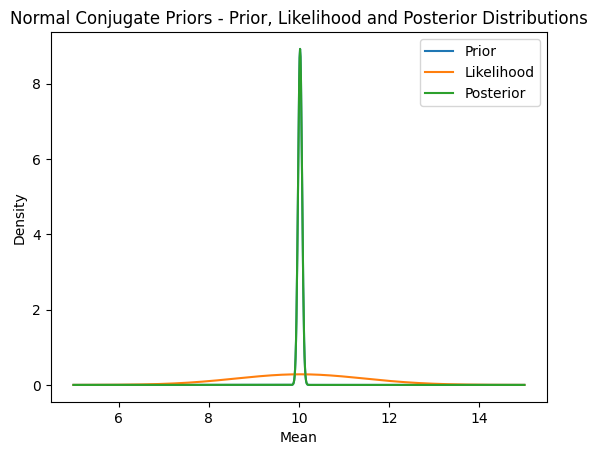

In [ ]:
import numpy as np
from scipy.stats import norm

# Generate synthetic data
np.random.seed(42)
true_mean = 10
true_variance = 2
num_samples = 1000
data = np.random.normal(true_mean, np.sqrt(true_variance), num_samples)

# Known variance of the data
known_variance = true_variance

# Prior distribution for the mean (normal distribution)
prior_mean = 0
prior_variance = 10

# Iterate over the data and update the prior distribution using Bayes' Rule
for i, sample in enumerate(data):
    # Calculate the precision of the prior and likelihood
    prior_precision = 1 / prior_variance
    likelihood_precision = 1 / known_variance
    
    # Calculate the posterior precision and mean
    posterior_precision = prior_precision + likelihood_precision
    posterior_mean = (prior_precision * prior_mean + likelihood_precision * sample) / posterior_precision
    
    # Update the prior with the new posterior
    prior_mean = posterior_mean
    prior_variance = 1 / posterior_precision

# Compare the estimated mean to the true mean
print("True mean: {:.2f}".format(true_mean))
print("Estimated mean: {:.2f}".format(prior_mean))

# Plot the prior, likelihood, and posterior distributions
import matplotlib.pyplot as plt

x = np.linspace(5, 15, 1000)
prior_distribution = norm.pdf(x, prior_mean, np.sqrt(prior_variance))
likelihood_distribution = norm.pdf(x, np.mean(data), np.sqrt(known_variance))
posterior_distribution = norm.pdf(x, posterior_mean, np.sqrt(1/posterior_precision))

plt.plot(x, prior_distribution, label="Prior")
plt.plot(x, likelihood_distribution, label="Likelihood")
plt.plot(x, posterior_distribution, label="Posterior")
plt.legend()
plt.title("Normal Conjugate Priors - Prior, Likelihood and Posterior Distributions")
plt.xlabel("Mean")
plt.ylabel("Density")
plt.show()

### Example 2 of Bayesian Inference

In this example, we'll use Bayes' Rule to determine if a coin is fair based on observed coin tosses. We'll model the coin tosses as Bernoulli random variables, where 1 represents "heads" and 0 represents "tails". We'll use a Beta distribution as the prior for the probability of getting a "heads" (p) since it's the conjugate prior for Bernoulli random variables.

We'll generate synthetic data, assuming a true probability of heads (p) and then update our prior iteratively using the observed coin tosses.

In this example, we generate 100 synthetic coin tosses with a true probability of heads (p) of 0.6. We use a uniform Beta(1, 1) prior for the probability of heads (p), and then we update the prior distribution with the observed coin tosses using Bayes' Rule. The resulting posterior distribution represents our updated belief about the probability of getting a "heads". Finally, we determine if the coin is fair based on the maximum a posteriori (MAP) estimate and a pre-defined threshold.

When you run the program, you'll see the prior and posterior distributions plotted, and the output will indicate that the coin is likely biased.

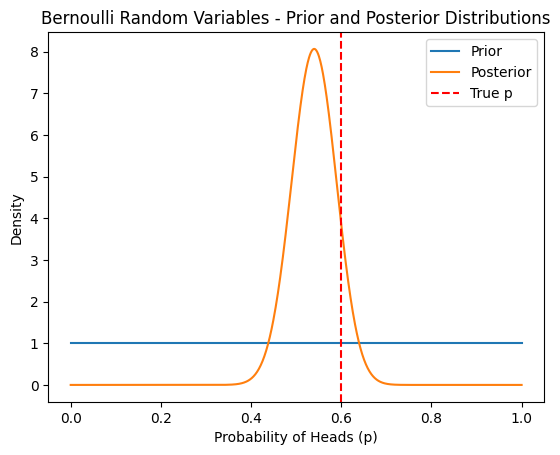

The coin is likely fair.


In [ ]:
import numpy as np
from scipy.stats import beta
import matplotlib.pyplot as plt

# Generate synthetic coin toss data
np.random.seed(42)
true_p = 0.6  # True probability of getting a "heads"
num_tosses = 100
coin_tosses = np.random.choice([0, 1], num_tosses, p=[1 - true_p, true_p])

# Prior distribution parameters for the probability of heads (Beta distribution)
alpha_prior = 1
beta_prior = 1

# Iterate over the coin tosses and update the prior distribution using Bayes' Rule
for toss in coin_tosses:
    if toss == 1:  # heads
        alpha_prior += 1
    else:  # tails
        beta_prior += 1

# Calculate the posterior distribution (Beta distribution)
posterior = beta(alpha_prior, beta_prior)

# Plot the prior and posterior distributions
x = np.linspace(0, 1, 1000)
prior_distribution = beta.pdf(x, 1, 1)  # Uniform prior
posterior_distribution = posterior.pdf(x)

plt.plot(x, prior_distribution, label="Prior")
plt.plot(x, posterior_distribution, label="Posterior")
plt.axvline(x=true_p, color='red', linestyle='--', label="True p")
plt.legend()
plt.title("Bernoulli Random Variables - Prior and Posterior Distributions")
plt.xlabel("Probability of Heads (p)")
plt.ylabel("Density")
plt.show()

# Determine if the coin is fair based on the maximum a posteriori (MAP) estimate
map_estimate = posterior.mean()
fair_threshold = 0.05  # Define a threshold for determining if the coin is fair

if np.abs(map_estimate - 0.5) < fair_threshold:
    print("The coin is likely fair.")
else:
    print("The coin is likely biased.")


### **Law of Large Numbers**

The law of large numbers is a fundamental theorem in probability theory that describes the behavior of the sample mean of a large number of independent and identically distributed random variables.

The law of large numbers states that as the number of trials or samples ($n$) increases, the sample mean ($\hat{X}$) of the random variables converges in probability to the true or population mean ($\mu$).

More formally, if $X_{1}, X_{2}, ..., X_{n}$ are independent and identically distributed random variables with mean $\mu$ and variance $\sigma^{2}$, then the sample mean $\hat{X}$ of n observations approaches $\mu$ as $n$ becomes large:

$$\text{lim} n\rightarrow\infty P(\vert\hat{X} - \mu\vert > \epsilon) = 0$$

where $\epsilon$ is any positive number.

In other words, as the number of observations or trials increases, the average of the observations gets closer to the true mean of the underlying distribution.

The law of large numbers is important in statistics and machine learning, where it is used to justify the use of sample means and other sample statistics as estimates of population parameters. The law of large numbers provides a theoretical foundation for the practice of statistical inference and allows us to draw conclusions about the population based on a sample of data.

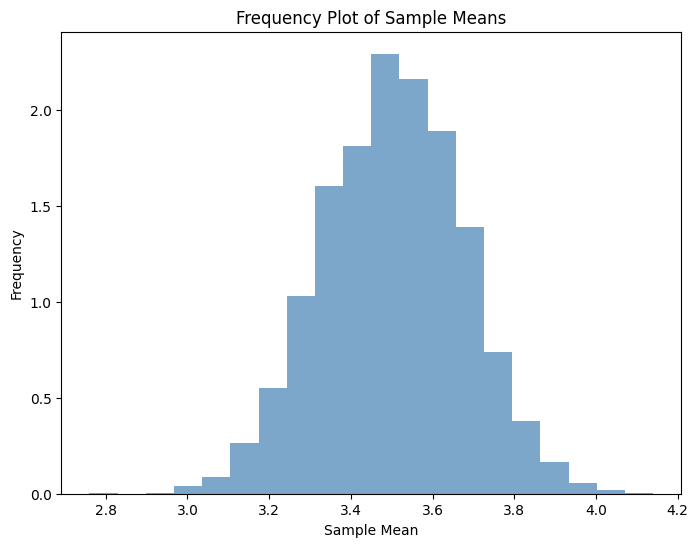

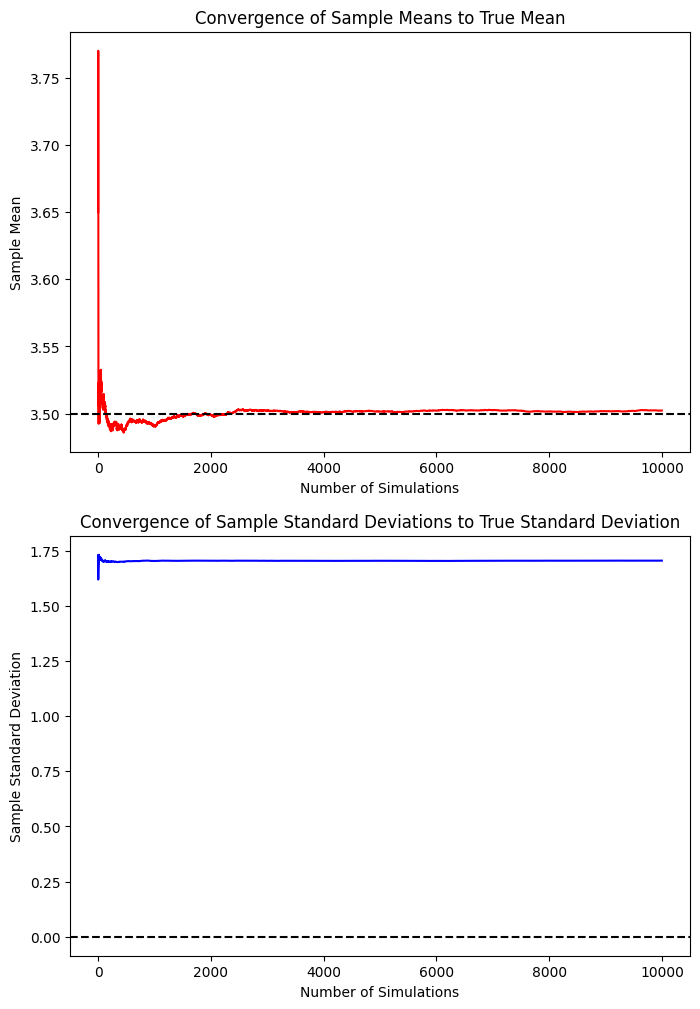

In [ ]:
import random
import numpy as np
import matplotlib.pyplot as plt

def roll_dice(n):
    """Simulate rolling a fair six-sided die n times."""
    return [random.randint(1, 6) for i in range(n)]

def sample_mean(data):
    """Calculate the sample mean of a list of numbers."""
    return sum(data) / len(data)

def sample_std(data):
    """Calculate the sample standard deviation of a list of numbers."""
    n = len(data)
    mean = sample_mean(data)
    return np.sqrt(sum([(x - mean)**2 for x in data]) / (n-1))

def law_of_large_numbers(n, m):
    """Simulate rolling a die n times m times and calculate the sample means and standard deviations."""
    means = []
    stds = []
    for i in range(m):
        data = roll_dice(n)
        mean = sample_mean(data)
        std = sample_std(data)
        means.append(mean)
        stds.append(std)
    return means, stds

# Set the number of dice rolls and the number of simulations
die_rolls = 100
simulations = 10000

# Simulate rolling the dice and calculate the sample means and standard deviations
means, stds = law_of_large_numbers(die_rolls, simulations)

# Calculate the average of the sample means and the standard deviation of the sample means
mean_avg = sum(means) / len(means)
std_avg = sum(stds) / len(stds)

# Plot the frequency histogram of the sample means
fig, ax = plt.subplots(figsize=(8,6))
ax.hist(means, bins=20, density=True, color='steelblue', alpha=0.7)
ax.set_title('Frequency Plot of Sample Means')
ax.set_xlabel('Sample Mean')
ax.set_ylabel('Frequency')

# Plot the convergence of the sample means and standard deviations to the true values
convergence_mean = np.cumsum(means) / np.arange(1, len(means) + 1)
convergence_std = np.cumsum(stds) / np.arange(1, len(stds) + 1)
fig, (ax2, ax3) = plt.subplots(2, 1, figsize=(8,12))
ax2.plot(convergence_mean, color='red')
ax2.axhline(y=3.5, color='black', linestyle='--')
ax2.set_title('Convergence of Sample Means to True Mean')
ax2.set_xlabel('Number of Simulations')
ax2.set_ylabel('Sample Mean')

ax3.plot(convergence_std, color='blue')
ax3.axhline(y=0.0, color='black', linestyle='--')
ax3.set_title('Convergence of Sample Standard Deviations to True Standard Deviation')
ax3.set_xlabel('Number of Simulations')
ax3.set_ylabel('Sample Standard Deviation')
plt.show()


### **Central Limit Theorem**

The central limit theorem is a fundamental result in probability theory that describes the behavior of the sum or average of a large number of independent and identically distributed random variables.

The central limit theorem states that as the number of random variables increases, the distribution of their sum or average approaches a normal distribution, regardless of the underlying distribution of the random variables themselves.

More formally, if $X_{1}, X_{2}, ..., X_{n}$ are independent and identically distributed random variables with mean μ and variance $\sigma^{2}$, then the sample mean (X̄) of n observations has an approximately normal distribution with mean μ and variance $\sigma^{2}/n$, as $n$ becomes large:

$$(\hat{X} - \mu) / (\sigma / \sqrt{n}) ~ N(0,1)$$

where N(0,1) denotes the standard normal distribution with mean 0 and variance 1.

In other words, the central limit theorem tells us that the distribution of the sum or average of a large number of random variables becomes increasingly close to a normal distribution, with a mean and variance that depend on the mean and variance of the original distribution.

The central limit theorem is an important concept in statistics and machine learning, where it is used to justify the use of normal distributions to approximate the distributions of sample statistics such as sample means and proportions. It also allows us to make probabilistic statements and construct confidence intervals and hypothesis tests based on large samples.

**The Zen of Python, by Tim Peters**

Beautiful is better than ugly.

Explicit is better than implicit.

Simple is better than complex.

Complex is better than complicated.

Flat is better than nested.

Sparse is better than dense.

Readability counts.

Special cases aren't special enough to break the rules.

Although practicality beats purity.

Errors should never pass silently.

Unless explicitly silenced.

In the face of ambiguity, refuse the temptation to guess.

There should be one-- and preferably only one --obvious way to do it.

Although that way may not be obvious at first unless you're Dutch.

Now is better than never.

Although never is often better than *right* now.

If the implementation is hard to explain, it's a bad idea.

If the implementation is easy to explain, it may be a good idea.

Namespaces are one honking great idea -- let's do more of those!

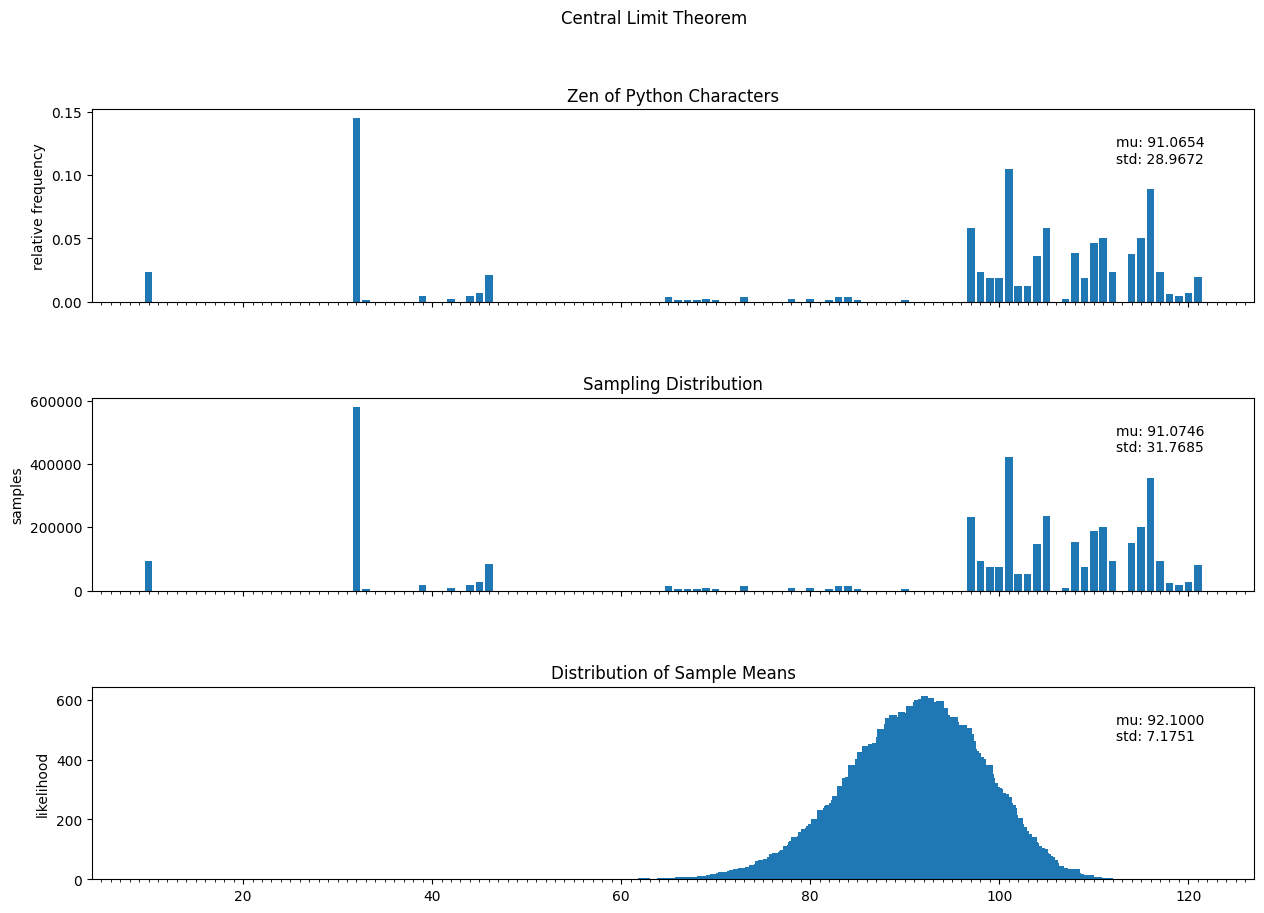

In [ ]:
# Example of CLT
import math
import this, codecs
from collections import Counter

# Setup figure
d = 1000
fig, ax = plt.subplots(3, figsize=(15,10), sharex=True)
fig.subplots_adjust(hspace=.5)
fig.suptitle('Central Limit Theorem')
ax[0].set_xticks(list(range(0, d)), minor=True)

# Data using Zen of Python
s = codecs.encode(this.s, 'rot13')
c = Counter(s)
ch = {ord(k): v for (k,v) in c.most_common()}
x = list(ch.keys())
y = ch.values()
d = max(ch)
color_int = d*1000
count = sum(y)
probs = [i/count for i in y]

mu = sum([i*p for i, p in zip(x, probs)])
sd = math.sqrt(sum([(i-mu)**2 for i in x])/len(x))
stats = [(mu, sd)]

ax[0].set_title(f'Zen of Python Characters')
ax[0].set_ylabel('relative frequency')
ax[0].bar(x, probs)

# Sampling Distribution
num_samples = 200000
n = 20

samples = [np.random.choice(list(x), n, replace=True, p=probs) for _ in range(num_samples)]
samples_ = np.concatenate(samples).ravel().tolist()
c_samp = Counter(samples_)
x_samp, y_samp = zip(*c_samp.most_common())
s_mu = sum(samples_)/len(samples_)
stats.append((s_mu, math.sqrt(sum([(i-s_mu)**2 for i in samples_])/len(samples_))))

ax[1].set_title('Sampling Distribution')
ax[1].set_ylabel('samples')
ax[1].bar(x_samp, y_samp)

# Distribution of Means
avg = [sum(s)/n for s in samples]
c_avg = Counter(avg)
x, y = zip(*c_avg.most_common())
stats.append((x[0], math.sqrt(sum([(i-x[0])**2 for i in avg])/len(avg))))

ax[2].set_title('Distribution of Sample Means')
ax[2].set_ylabel('likelihood')
ax[2].bar(x, y)

# Annotate subplots with mu and sd
for i, axs in enumerate(ax):
    axs.annotate(f'mu: {stats[i][0]:.4f}\nstd: {stats[i][1]:.4f}', xy=(1, 0), xycoords='axes fraction', 
                 xytext=(-100,100), textcoords='offset points', ha='left')

### Maximum Likelihood Estimation (MLE)

**Product rule of probability** - Assuming the data is sampled $i.i.d.$ (independent identically distributed), we can model the joint likelihood of the data as the product of individual likelihoods.
$$
D = \{(x_{0}, y_{0}),...,(x_{n}, y_{n}))\}
$$

$$
\begin{align}
	L(\theta) &= \prod_{d\in D}P(d|\theta)\\
	\text{log }L(\theta)&=\sum_{d\in D}\text{log }P(d\vert\theta)\\
  \theta^{'}=\underset{\theta}{\text{argmax}}\text{ log }L(\theta)&=\sum_{d\in D}\text{log }P(d\vert\theta)
\end{align}
$$

We take the log-likelihood because summing is numerically stable.

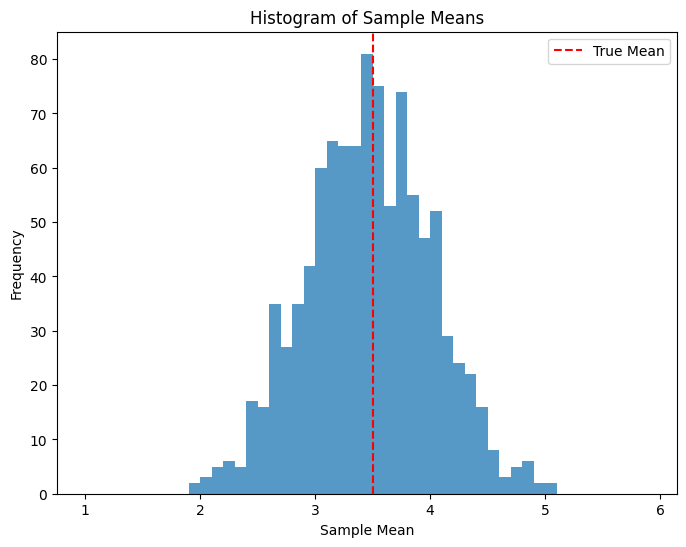

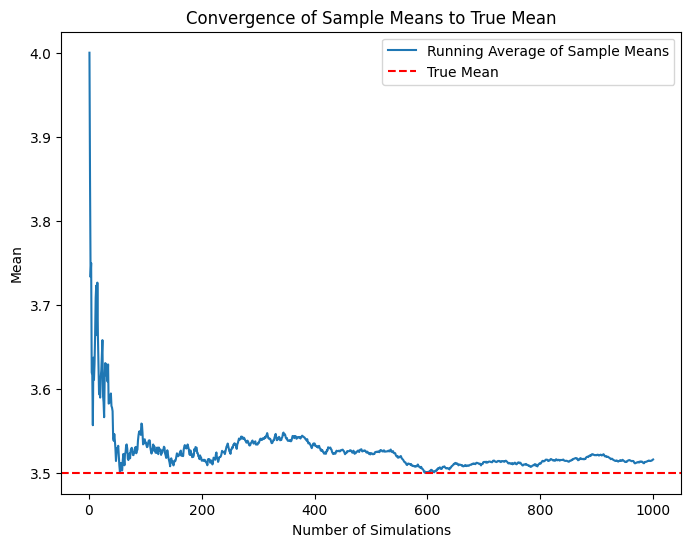

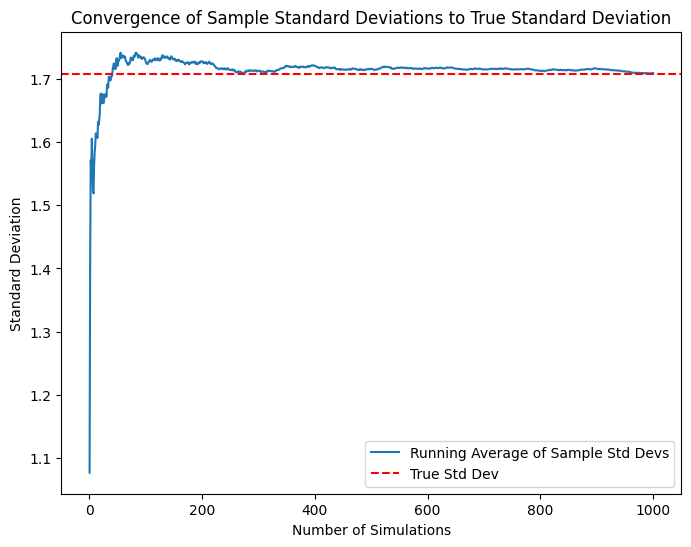

In [ ]:
import random
import numpy as np
import matplotlib.pyplot as plt

def roll_dice(n):
    """Simulate rolling a fair six-sided die n times."""
    return [random.randint(1, 6) for i in range(n)]

def sample_mean(data):
    """Calculate the sample mean of a list of numbers."""
    return sum(data) / len(data)

def sample_std(data):
    """Calculate the sample standard deviation of a list of numbers."""
    mean = sample_mean(data)
    return np.sqrt(sum([(x - mean)**2 for x in data]) / len(data))

# Set the number of dice rolls and the number of simulations
n = 10
m = 1000

# Simulate rolling the dice and calculate the sample means
sample_means = [sample_mean(roll_dice(n)) for _ in range(m)]

# Calculate the true mean and standard deviation of a fair six-sided die
true_mean = np.mean(list(range(1, 7)))
true_std = np.std(list(range(1, 7)), ddof=0)

# Calculate the cumulative sample standard deviations
cumulative_data = []
cumulative_stds = []
for i in range(m):
    cumulative_data.extend(roll_dice(n))
    cumulative_stds.append(sample_std(cumulative_data))

# Plot the histogram of sample means
plt.figure(figsize=(8, 6))
plt.hist(sample_means, bins=np.arange(1, 6, 0.1), alpha=0.75)
plt.axvline(x=true_mean, color='red', linestyle='--', label="True Mean")
plt.title("Histogram of Sample Means")
plt.xlabel("Sample Mean")
plt.ylabel("Frequency")
plt.legend()
plt.show()

# Plot the convergence of sample means to the true mean
plt.figure(figsize=(8, 6))
plt.plot(range(1, m+1), np.cumsum(sample_means) / np.arange(1, m+1), label="Running Average of Sample Means")
plt.axhline(y=true_mean, color='red', linestyle='--', label="True Mean")
plt.title("Convergence of Sample Means to True Mean")
plt.xlabel("Number of Simulations")
plt.ylabel("Mean")
plt.legend()
plt.show()

# Plot the convergence of sample standard deviations to the true standard deviation
plt.figure(figsize=(8, 6))
plt.plot(range(1, m+1), cumulative_stds, label="Running Average of Sample Std Devs")
plt.axhline(y=true_std, color='red', linestyle='--', label="True Std Dev")
plt.title("Convergence of Sample Standard Deviations to True Standard Deviation")
plt.xlabel("Number of Simulations")
plt.ylabel("Standard Deviation")
plt.legend()
plt.show()


## Decision Theory

Decision theory is a branch of mathematics, statistics, and philosophy that helps in decision-making situations where there is uncertainty about the outcomes of different options or courses of action.

It consists of three key components:

- **Decision space** - it is the set of all possible actions that the decision-maker can take.
- **Set of possible outcomes** - it includes all possible outcomes that could result from those actions.
- **Set of preferences or utility functions** - it describes the decision-maker's preferences over those outcomes.

The utility function assigns a value to each possible outcome, reflecting the decision-maker's preferences or values. The goal of decision theory is to identify the decision that maximizes the expected utility of the decision-maker, taking into account the probabilities of different outcomes and the decision-maker's preferences.

To make this calculation, decision theorists use tools like expected value, decision trees, and game theory to model the decision-making process and determine the best course of action.

Decision theory has a wide range of applications in fields such as economics, finance, management, psychology, and artificial intelligence. It provides a rigorous and systematic framework for making decisions in situations where there is uncertainty, and can help decision-makers to make better-informed and more rational choices.

### Empirical Risk Minimization (ERM)

Empirical risk minimization (ERM) is a technique used in machine learning and statistics to find the best possible model that fits a given dataset.

To do this, ERM involves the following steps:

- A set of candidate models is chosen.
- Each model is evaluated on a training dataset by calculating the empirical risk, which is the difference between the predicted outcomes of the model and the actual outcomes in the training data.
- The model with the lowest empirical risk is selected as the best model.

Definitions:
- **Candidate models**: A set of models that are evaluated to determine the best fit for the data.
- **Empirical risk**: The difference between the predicted outcomes of a model and the actual outcomes in the training data.
- **Loss function**: A function used to measure the discrepancy between the predicted outcomes and the actual outcomes in the training data. Examples include mean squared error, cross-entropy loss, and hinge loss.
- **Overfitting**: A phenomenon where a model fits the training data too closely and fails to generalize well to new data.
- **Regularization**: A technique used to prevent overfitting by adding a penalty term to the loss function.
- **Cross-validation**: A technique used to evaluate the performance of a model on unseen data by splitting the data into training and validation sets.

In summary, ERM is a technique that involves finding the best model to fit a dataset by minimizing the empirical risk, which is the difference between the predicted and actual outcomes in the training data. ERM is a fundamental technique in machine learning and is widely used to build models in various applications.

### Linear Regression

The mathematical equation for a linear regression model with n input variables is:

$$y = w_0 + w_1x_1 + w_2x_2 + \dots + w_nx_n$$
where $y$ is the output variable (in this case, housing price), $w_0$ is the intercept, w_1 to w_n are the coefficients for the input variables $x_1$ to $x_n$, and $x_i$ is the value of the ith input variable.

The goal of fitting a linear regression model to a set of training data is to find the values of $w_0$ to $w_n$ that minimize the sum of the squared differences between the predicted and actual values of y for the training data. This is expressed as the following optimization problem:

$$\min_{w_0, w_1, \dots, w_n} \sum_{i=1}^m (y_i - (w_0 + w_1x_{i1} + w_2x_{i2} + \dots + w_nx_{in}))^2$$
where m is the number of training examples.

This optimization problem can be solved using the normal equation:

$$w = (X^TX)^{-1}X^Ty$$
where X is the design matrix, which contains the values of the input variables for each training example, y is the vector of output variable values for each training example, and w is the vector of coefficients that minimize the sum of squared differences.



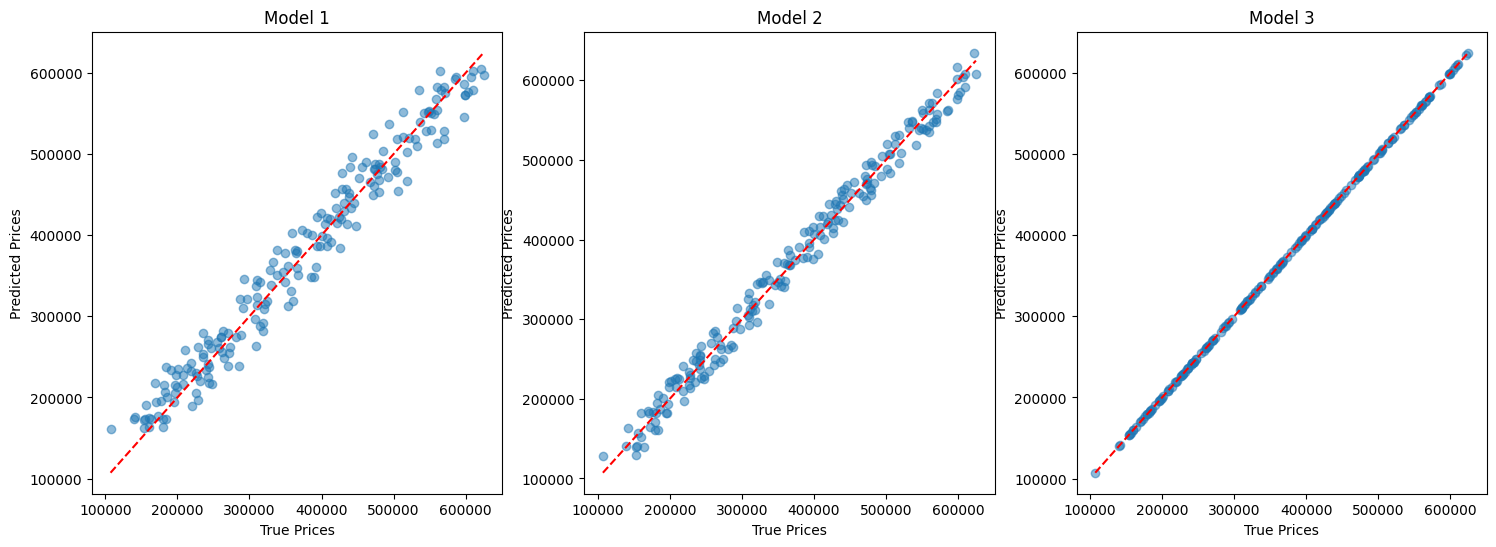

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def train_test_split(data, test_size=0.25, random_state=None):
    np.random.seed(random_state)
    np.random.shuffle(data)
    test_idx = int(test_size * len(data))
    test_data = data[:test_idx]
    train_data = data[test_idx:]
    return train_data, test_data

# Generate random data points for 1000 houses
num_houses = 1000

# Randomly generate areas between 500 and 5000 square feet
areas = np.random.uniform(500, 5000, num_houses)

# Randomly generate numbers of rooms between 2 and 5
rooms = np.random.randint(2, 6, num_houses)

# Randomly generate location scores between 1 and 10
locations = np.random.randint(1, 11, num_houses)

# Compute housing prices based on a linear function of area, number of rooms, and location score
prices = 10000 + 100 * areas + 20000 * rooms + 5000 * locations

# Combine the features and target variable into a single matrix
data = np.column_stack((areas, rooms, locations, prices))

# Split the data into training and test sets
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)

def fit_model(X, y):
    X = np.hstack([np.ones((len(X), 1)), X])
    return np.linalg.inv(X.T @ X) @ X.T @ y

model1 = fit_model(train_data[:, [0]], train_data[:, -1])
model2 = fit_model(train_data[:, [0, 1]], train_data[:, -1])
model3 = fit_model(train_data[:, :3], train_data[:, -1])

def mse_loss(X, y, w):
    y_pred = X @ w
    return np.mean((y - y_pred) ** 2)

loss1 = mse_loss(np.hstack([np.ones((len(test_data), 1)), test_data[:, [0]]]), test_data[:, -1], model1)
loss2 = mse_loss(np.hstack([np.ones((len(test_data), 1)), test_data[:, :2]]), test_data[:, -1], model2)
loss3 = mse_loss(np.hstack([np.ones((len(test_data), 1)), test_data[:, :3]]), test_data[:, -1], model3)

if loss1 < loss2 and loss1 < loss3:
    best_model = model1
elif loss2 < loss3:
    best_model = model2
else:
    best_model = model3

# Plot the data and predictions
fig, ax = plt.subplots(1, 3, figsize=(18, 6))
for i, (model, title) in enumerate(zip([model1, model2, model3], ["Model 1", "Model 2", "Model 3"])):
    X = np.hstack([np.ones((len(test_data), 1)), test_data[:, :i+1]])
    y = test_data[:, -1]
    y_pred = X @ model
    ax[i].scatter(y, y_pred, alpha=0.5)
    ax[i].plot([min(y), max(y)], [min(y), max(y)], color='red', linestyle='--')
    ax[i].set_title(title)
    ax[i].set_xlabel("True Prices")
    ax[i].set_ylabel("Predicted Prices")

plt.show()


The three models in the provided code are different in terms of the features they use to predict housing prices. Each model uses a linear regression approach to fit the relationship between the features and the target variable (housing prices). Here's a brief explanation of each model:

***Model 1***: This model uses only the "area" feature to predict housing prices. It assumes that the price of a house depends solely on its area. The relationship between the area and the price is linear, meaning that as the area increases, the price increases proportionally.

***Model 2***: This model uses two features, "area" and "number of rooms", to predict housing prices. It assumes that the price of a house depends on both its area and the number of rooms it has. The relationship between the area, the number of rooms, and the price is assumed to be linear, which means that as either the area or the number of rooms increases, the price increases proportionally.

***Model 3***: This model uses all three features: "area", "number of rooms", and "location score" to predict housing prices. It assumes that the price of a house depends on its area, the number of rooms, and the location score. The relationship between the area, the number of rooms, the location score, and the price is assumed to be linear, meaning that as any of these features increase, the price increases proportionally.

In summary, the difference between the three models lies in the number of features they use to predict housing prices. Model 1 uses only one feature (area), Model 2 uses two features (area and number of rooms), and Model 3 uses all three features (area, number of rooms, and location score). Using more features can potentially lead to better predictions, but it's essential to evaluate the models based on their performance on test data to determine the best model.






